In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the data
df = pd.read_csv("../Data/output.csv",low_memory=False) 

In [3]:
# Select the desired columns for linear regression
columns = ['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode', 'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CustomValueEstimate',  'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']
data_selected = df[columns]


In [4]:
# Check the selected data
data_selected.head(10)

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
0,145249,12827,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,119300.0,0.01,25.0000,21.929825,0.0
1,145249,12827,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,119300.0,0.01,25.0000,21.929825,0.0
2,145249,12827,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,119300.0,0.01,25.0000,0.000000,0.0
3,145255,12827,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,119300.0,119300.00,584.6468,512.848070,0.0
4,145255,12827,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,119300.0,119300.00,584.6468,0.000000,0.0
5,145247,12827,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,119300.0,500000.00,57.5412,3.256435,0.0
6,145247,12827,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,119300.0,500000.00,57.5412,50.474737,0.0
7,145247,12827,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,119300.0,500000.00,57.5412,35.332316,0.0
8,145247,12827,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,119300.0,500000.00,57.5412,0.000000,0.0
9,145245,12827,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,119300.0,5000000.00,1.1508,1.009474,0.0


Feature Engineering 

In [6]:
import datetime
# Calculate age of the vehicle
current_year = datetime.datetime.now().year
data_selected.loc[:, 'VehicleAge'] = current_year - data_selected['RegistrationYear']


In [9]:
# Calculate engine power
data_selected.loc[:,'EnginePower'] = data_selected['kilowatts'] * data_selected['cubiccapacity']


In [11]:
# Calculate vehicle value to premium ratio
data_selected.loc[:, 'ValueToPremiumRatio'] = data_selected['CustomValueEstimate'] / data_selected['CalculatedPremiumPerTerm']

In [12]:
data_selected.head(10)

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims,VehicleAge,EnginePower,ValueToPremiumRatio
0,145249.0,12827.0,1459.0,44069150.0,2004.0,6.0,2597.0,130.0,4.0,119300.0,0.01,25.0000,21.929825,0.0,20.0,337610.0,4772.000000
1,145249.0,12827.0,1459.0,44069150.0,2004.0,6.0,2597.0,130.0,4.0,119300.0,0.01,25.0000,21.929825,0.0,20.0,337610.0,4772.000000
2,145249.0,12827.0,1459.0,44069150.0,2004.0,6.0,2597.0,130.0,4.0,119300.0,0.01,25.0000,0.000000,0.0,20.0,337610.0,4772.000000
3,145255.0,12827.0,1459.0,44069150.0,2004.0,6.0,2597.0,130.0,4.0,119300.0,119300.00,584.6468,512.848070,0.0,20.0,337610.0,204.054824
4,145255.0,12827.0,1459.0,44069150.0,2004.0,6.0,2597.0,130.0,4.0,119300.0,119300.00,584.6468,0.000000,0.0,20.0,337610.0,204.054824
5,145247.0,12827.0,1459.0,44069150.0,2004.0,6.0,2597.0,130.0,4.0,119300.0,500000.00,57.5412,3.256435,0.0,20.0,337610.0,2073.297046
6,145247.0,12827.0,1459.0,44069150.0,2004.0,6.0,2597.0,130.0,4.0,119300.0,500000.00,57.5412,50.474737,0.0,20.0,337610.0,2073.297046
7,145247.0,12827.0,1459.0,44069150.0,2004.0,6.0,2597.0,130.0,4.0,119300.0,500000.00,57.5412,35.332316,0.0,20.0,337610.0,2073.297046
8,145247.0,12827.0,1459.0,44069150.0,2004.0,6.0,2597.0,130.0,4.0,119300.0,500000.00,57.5412,0.000000,0.0,20.0,337610.0,2073.297046
9,145245.0,12827.0,1459.0,44069150.0,2004.0,6.0,2597.0,130.0,4.0,119300.0,5000000.00,1.1508,1.009474,0.0,20.0,337610.0,103667.014251


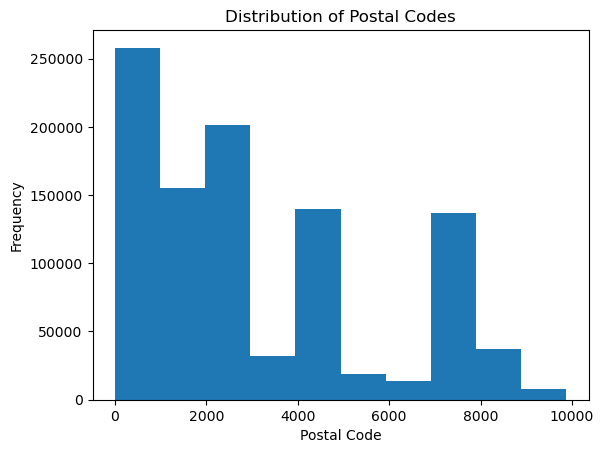

In [14]:
import matplotlib.pyplot as plt

plt.hist(df['PostalCode'], bins=10)
plt.xlabel('Postal Code')
plt.ylabel('Frequency')
plt.title('Distribution of Postal Codes')
plt.show()

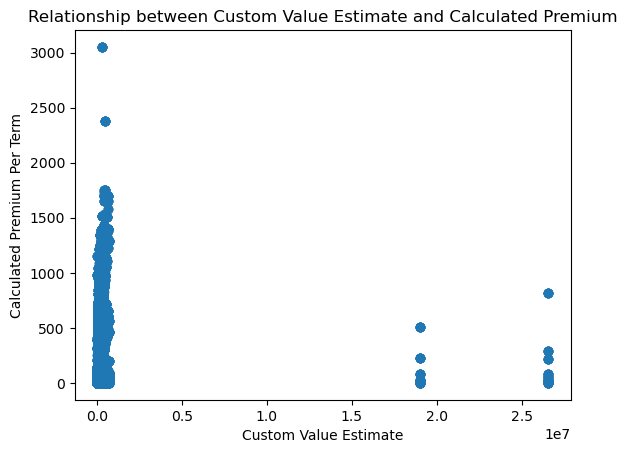

In [15]:
plt.scatter(df['CustomValueEstimate'], df['CalculatedPremiumPerTerm'])
plt.xlabel('Custom Value Estimate')
plt.ylabel('Calculated Premium Per Term')
plt.title('Relationship between Custom Value Estimate and Calculated Premium')
plt.show()

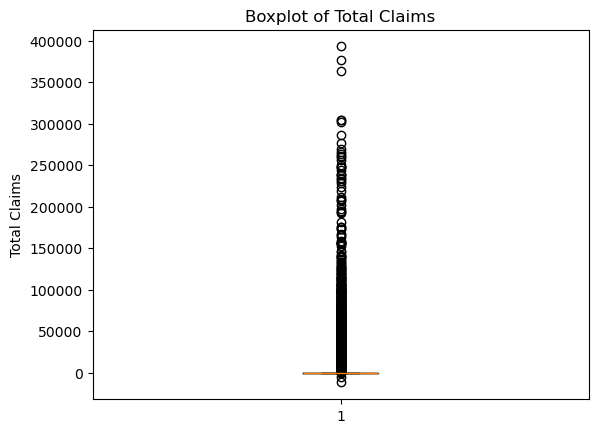

In [16]:
plt.boxplot(df['TotalClaims'])
plt.ylabel('Total Claims')
plt.title('Boxplot of Total Claims')
plt.show()

One-Hot Encoding

In [17]:
# Select the categorical columns for one-hot encoding
cat_cols = ['UnderwrittenCoverID', 'mmcode']

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(data_selected[cat_cols])

# Concatenate the one-hot encoded columns with the original DataFrame
data_encoded = pd.concat([data_selected, one_hot_encoded], axis=1)

# Drop the original categorical columns
data_encoded.drop(columns=cat_cols, inplace=True)

# Print the encoded DataFrame
print(data_encoded)

             PolicyID  PostalCode  RegistrationYear  Cylinders  cubiccapacity  \
0             12827.0      1459.0            2004.0        6.0         2597.0   
1             12827.0      1459.0            2004.0        6.0         2597.0   
2             12827.0      1459.0            2004.0        6.0         2597.0   
3             12827.0      1459.0            2004.0        6.0         2597.0   
4             12827.0      1459.0            2004.0        6.0         2597.0   
...               ...         ...               ...        ...            ...   
1000094         389.0      7493.0            2013.0        4.0         2693.0   
1000095         389.0      7493.0            2013.0        4.0         2693.0   
1000096         389.0      7493.0            2013.0        4.0         2693.0   
1000097         389.0      7493.0            2013.0        4.0         2693.0   
EnginePower       NaN         NaN               NaN        NaN            NaN   

             kilowatts  Num

Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

# Select the categorical columns for label encoding
cat_cols = ['PolicyID', 'PostalCode']

# Perform label encoding
label_encoder = LabelEncoder()
for col in cat_cols:
    data_selected[col] = label_encoder.fit_transform(data_selected[col])

# Print the encoded data_selectedFrame
print(data_selected)

             UnderwrittenCoverID  PolicyID  PostalCode      mmcode  \
0                       145249.0      4627         261  44069150.0   
1                       145249.0      4627         261  44069150.0   
2                       145249.0      4627         261  44069150.0   
3                       145255.0      4627         261  44069150.0   
4                       145255.0      4627         261  44069150.0   
...                          ...       ...         ...         ...   
1000094                  31520.0       195         773   4614100.0   
1000095                  31520.0       195         773   4614100.0   
1000096                  31519.0       195         773   4614100.0   
1000097                  31519.0       195         773   4614100.0   
EnginePower                  NaN      7000         888         NaN   

             RegistrationYear  Cylinders  cubiccapacity  kilowatts  \
0                      2004.0        6.0         2597.0      130.0   
1                  

C:\Users\huawei\AppData\Local\Temp\ipykernel_2144\602893430.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[col] = label_encoder.fit_transform(data_selected[col])
C:\Users\huawei\AppData\Local\Temp\ipykernel_2144\602893430.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[col] = label_encoder.fit_transform(data_selected[col])


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Select the risk assessment features
risk_features = ['CustomValueEstimate', 'SumInsured', 'CalculatedPremiumPerTerm',
                 'TotalPremium', 'VehicleAge', 'EnginePower', 'ValueToPremiumRatio']

# Select the target variable
target_variable = 'TotalClaims'

X = data_selected[risk_features]
y = data_selected[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [42]:
import numpy as np
from sklearn.impute import SimpleImputer
# Check for NaN values
nan_indices = np.isnan(X_train)

# Check for infinity values
inf_indices = np.isinf(X_train)

# Replace NaN values with np.nan
X_train[nan_indices] = np.nan

# Replace infinity values with np.nan
X_train[inf_indices] = np.nan

# Create an instance of SimpleImputer with the desired strategy (e.g., mean, median, most_frequent)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your dataset
imputer.fit(X_train)

# Transform your dataset by replacing the NaN values with the imputed values
X_train = imputer.transform(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
linear_rmse = mean_squared_error(y_test, y_pred_linear, squared=False)

# Classification Model (Decision Tree)
# Assuming TotalClaims is categorized (e.g., low, medium, high)
# You'll need to adjust the threshold for categorization
data_selected['TotalClaimsCategory'] = pd.cut(data_selected['TotalClaims'], bins=[0, 10000, 20000, float('inf')], 
                                     labels=['Low', 'Medium', 'High'])
y_class = data_selected['TotalClaimsCategory']

X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train_class)
y_pred_class = tree_model.predict(X_test)
class_accuracy = accuracy_score(y_test_class, y_pred_class)


In [ ]:
# Report
print("Linear Regression Model:")
print(f"Root Mean Squared Error (RMSE): {linear_rmse:.2f}")

print("\nDecision Tree Classification Model:")
print(f"Accuracy: {class_accuracy:.2f}")

In [ ]:
# Example Predictions
new_data = pd.DataFrame({'UnderwrittenCoverID': [1, 2], 'SumInsured': [5000000, 10000000], 
                         'VehicleType': [1, 2]})  # Replace with actual values
predicted_claims_linear = linear_model.predict(new_data)
predicted_claims_class = tree_model.predict(new_data)


In [ ]:

print("\nExample Predictions:")
print(f"Linear Regression: {predicted_claims_linear}")
print(f"Decision Tree Classification: {predicted_claims_class}")